# Exercise 1
# Running a single-column sea ice model - Icepack

* **Description**: Instructions for running Icepack with an atmospheric forcing derived from the Atmospheric Radiation Measurement (ARM) program's North Slope of Alaska (NSA) facility and exploring the output.
* **Creator**: David Clemens-Sewall
* **Date**: March 2025

## Background

TODO

## Install and run Icepack

TODO: Clean this up

1) Install Icepack following the directions in the Icepack documentation: https://cice-consortium-icepack.readthedocs.io/en/main/user_guide/ug_running.html#porting-to-laptop-or-personal-computers

2) Within ~/icepack-dirs/input/Icepack_data/forcing/ create a subdirectory named 'MDF'. Copy the file `sikumiut_MDF_20241001_20250325.nc` from the sikumiut/icepack_activities/data into the MDF directory.

3) From the Icepack root directory, setup an Icepack case using the settings `ionetcdf,histcdf`. E.g.: `./icepack.setup -m conda -e linux -c ~/icepack-dirs/cases/sikumiut_elson_base -s ionetcdf,histcdf`

4) Navigate to that case directory. Build Icepack with the `./icepack.build` command. You should see Icepack compile.

5) Make the following edits to the icepack_in file:
```
    use_leap_years = .true.
    year_init      = 2024
    istep0         = 6960
    npt            = 3792
	
	hmix_fixed      = 3.0
	atm_data_type   = 'MDF'
	ocn_data_type   = 'default'
	fyear_init		= 2024
	atm_data_file   = 'sikumiut_MDF_20241001_20250325.nc'
    ice_data_file   = 'unknown_ice_data_file'
    atm_data_format = 'nc'
	precalc_forc  = .true.
```
Explanations:

istep0: What timestep, counting from midnight January 1 of `year_init`, to begin the simulation at. In this case, because our timestep is one hour (`dt = 3600.0` seconds) 6,960 hours into the year 2024 corresponds to October 17, 2024. This is the day that Michael Lawson reported satellite imagery showing ice in Elson Lagoon. You might consider changing istep0 if you had information that freeze-up started earlier.

npt: The number of timesteps to simulate. In this case our forcing data goes until March 24, so it is the number of hours between March 24, 2025 and October 17, 2024.

hmix_fixed: the depth of the ocean mixed layer in m, in the case of Elson this is just 3 m.

atm_data_type: MDF is the option to use the MDF-formatted netCDF forcing file

ocn_data_type: set this to default to prevent an ocean forcing file from being used. We can set the ocean parameters with 
sss_mixed, qdp_fixed, hmix_fixed, and ustar_min.

atm_data_file: The atmospheric forcing from the ARM site.

ice_data_file: reset this so that the SHEBA dynamics forcing is not used.

atm_data_format: Our forcing is a netCDF file.

precalc_forc: Using a MDF forcing requires us to precalculate the forcing data at the model's timesteps.

6) Run Icepack with the command `./icepack.submit`. You should see ICEPACK COMPLETED SUCCESSFULLY

## Examine Icepack output

In [1]:
# Load required libraries
import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd

# icepacktools is a small library containing functions to make it easier
# to work with Icepack output
from icepacktools import load_icepack_hist, plot_hist_var
from icepacktools import plot_ice_var, plot_handler

In [2]:
# Load icepack output
ip_dirs_path = "/home/dcsewall/code/docker_icepack_interactive/icepack-dirs"
run_dict = {"sikumiut_elson_base": None,
            }

hist_dict = {}
for key, value in run_dict.items():
    hist_dict[key] = load_icepack_hist(run_name=key, 
                                       icepack_dirs_path=ip_dirs_path, 
                                       hist_filename=value)


In [3]:
# Examine the contents of an icepack history file
hist_dict["sikumiut_elson_base"]

<xarray.Dataset>
Dimensions:        (ni: 4, ncat: 5, ntrcr: 21, time: 3792)
Coordinates:
  * ni             (ni) int32 1 2 3 4
  * ncat           (ncat) int32 1 2 3 4 5
  * ntrcr          (ntrcr) int32 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21
  * time           (time) datetime64[ns] 2024-10-17T01:00:00 ... 2025-03-24
Data variables: (12/40)
    timestep       (time) int32 ...
    date           (time) float64 ...
    aice           (time, ni) float64 ...
    vice           (time, ni) float64 ...
    vsno           (time, ni) float64 ...
    uvel           (time, ni) float64 ...
    ...             ...
    aicen          (time, ncat, ni) float64 ...
    vicen          (time, ncat, ni) float64 ...
    vsnon          (time, ncat, ni) float64 ...
    trcr           (time, ntrcr, ni) float64 ...
    trcrn          (time, ncat, ntrcr, ni) float64 ...
    sst_above_frz  (time, ni) float64 0.0809 0.1026 0.102 ... 0.0 0.0 1.905
Attributes:
    run_name:  sikumiut_elson_base

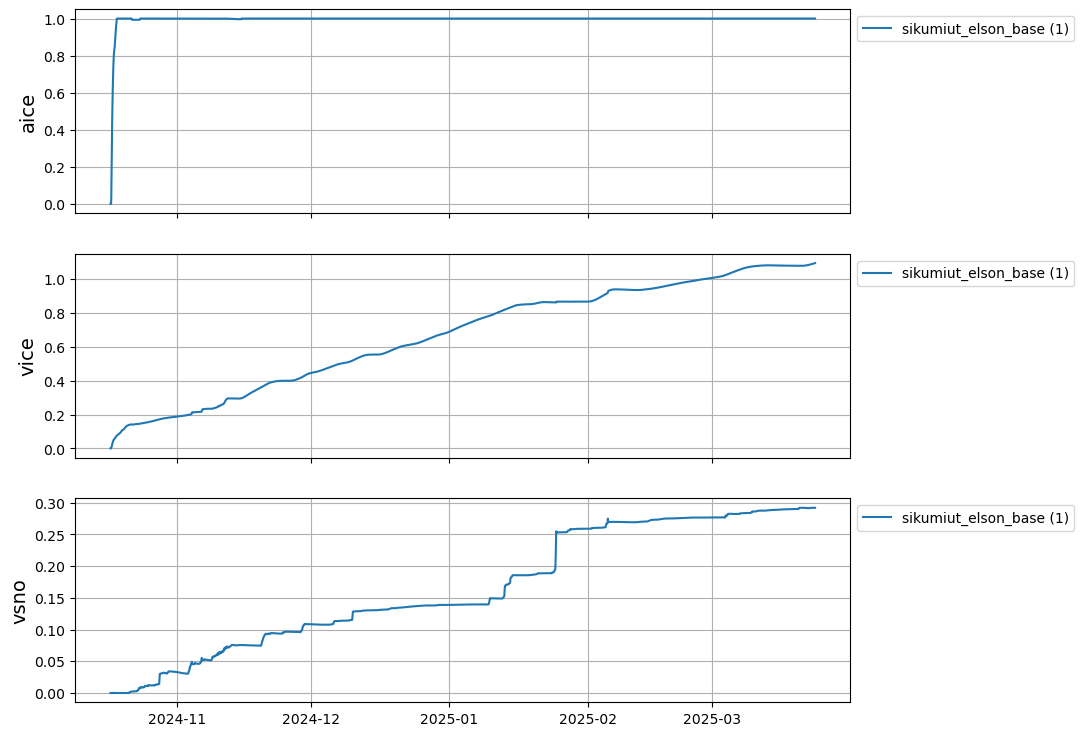

In [4]:
# Plot ice state evolution

run_plot_dict = {"sikumiut_elson_base": [1]}
var_names = ['aice', 'vice', 'vsno']

f, axs = plot_handler(run_plot_dict, var_names, hist_dict)
plt.show()
